In [2]:
# LIBS
import yfinance as yf

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd, numpy as np
import time
from time import sleep
import datetime
from datetime import datetime, timedelta, timezone
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'g'
# df = pd.read_excel("Retail2.xlsx")

# For Graph
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
# import plotly.plotly as py
import plotly.graph_objs as go
import plotly

### Input Data

In [3]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "RUB=X", #^GSPC RTSI.ME

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "56d", #3285d

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d", #60m

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-06-29,69.733002,70.421997,69.593002,69.724297,0
2020-06-30,69.973000,71.297997,69.973000,69.973000,0
2020-07-01,71.153198,71.191803,70.531998,71.150703,0
2020-07-02,70.756699,70.756699,70.166397,70.858704,0
2020-07-03,70.588303,71.612999,70.152000,70.588303,0
2020-07-06,71.334999,72.078003,70.780602,71.331100,0
2020-07-07,71.806801,72.278000,71.226097,71.788002,0
2020-07-08,71.410004,71.690002,71.028702,71.410004,0
2020-07-09,71.200500,71.284599,70.488998,71.204102,0


In [4]:
type(data), data.index[0], data.shape

(pandas.core.frame.DataFrame, Timestamp('2020-06-29 00:00:00'), (56, 5))

## Merge

In [5]:
EDT = datetime(2020, 9, 14).date()
# periods = int(delta_DT.days*24 + dt.seconds/3600 + 1)
# periods = int(delta_DT.days*24+0)
delta_DT = timedelta(days = 56)
periods = int(delta_DT.days*1+0)
df_retro = pd.DataFrame(pd.date_range(end=EDT, periods=periods, freq="D"), 
                        columns=['DT'])
df_retro

,DT
0,2020-07-21
1,2020-07-22
2,2020-07-23
3,2020-07-24
4,2020-07-25
5,2020-07-26
6,2020-07-27
7,2020-07-28
8,2020-07-29
9,2020-07-30


In [6]:
data = data.assign(DT = data.index)
data.head()

,Open,High,Low,Close,Volume,DT
Date,,,,,,
2020-06-29,69.733002,70.421997,69.593002,69.724297,0,2020-06-29
2020-06-30,69.973000,71.297997,69.973000,69.973000,0,2020-06-30
2020-07-01,71.153198,71.191803,70.531998,71.150703,0,2020-07-01
2020-07-02,70.756699,70.756699,70.166397,70.858704,0,2020-07-02
2020-07-03,70.588303,71.612999,70.152000,70.588303,0,2020-07-03


In [7]:
df_trn_y = pd.merge(df_retro, data, how='left', on='DT')
# df_trn_y[96:144] # DateTime
df_trn_y # Only Time

,DT,Open,High,Low,Close,Volume
0,2020-07-21,71.366997,71.490196,70.576500,71.490700,0.0
1,2020-07-22,70.692497,71.204903,70.599998,70.697098,0.0
2,2020-07-23,71.144897,71.598000,70.802696,71.129898,0.0
3,2020-07-24,71.312302,71.973999,71.262199,71.304901,0.0
4,2020-07-25,NaN,NaN,NaN,NaN,NaN
5,2020-07-26,NaN,NaN,NaN,NaN,NaN
6,2020-07-27,71.761398,71.899002,71.407997,71.709999,0.0
7,2020-07-28,71.565804,72.647202,71.468399,71.540100,0.0
8,2020-07-29,72.466003,72.584000,72.067001,72.474098,0.0
9,2020-07-30,72.467102,73.764999,72.465797,72.475800,0.0


In [7]:
# data.head()

### Null check and fillna for data

In [8]:
df_trn_y.iloc[:,[0,1,2,3,4]].isnull().values.any()

True

In [9]:
# df_trn_y = df_trn_y.dropna()
df_trn_y = df_trn_y.fillna(0)
df_trn_y.head(9)
# df_trn_y[96:144]

,DT,Open,High,Low,Close,Volume
0,2020-07-21,71.366997,71.490196,70.576500,71.490700,0.0
1,2020-07-22,70.692497,71.204903,70.599998,70.697098,0.0
2,2020-07-23,71.144897,71.598000,70.802696,71.129898,0.0
3,2020-07-24,71.312302,71.973999,71.262199,71.304901,0.0
4,2020-07-25,0.000000,0.000000,0.000000,0.000000,0.0
5,2020-07-26,0.000000,0.000000,0.000000,0.000000,0.0
6,2020-07-27,71.761398,71.899002,71.407997,71.709999,0.0
7,2020-07-28,71.565804,72.647202,71.468399,71.540100,0.0
8,2020-07-29,72.466003,72.584000,72.067001,72.474098,0.0


### Model estimate criteria

In [106]:
class ECriteria: 
    # ECC R2, Var, MAPE, F
    def __init__(self, r2_adj, c_var, mape, f, f_c):         
        self.r2_adj = r2_adj
        self.c_var = c_var
        self.mape = mape
        self.f = f
        self.f_c = f_c

In [108]:
ecrit_obj = ECriteria(1,1,1,1,1)

In [110]:
ecrit_obj.r2_adj

1

In [111]:
adj_sample = df_trn_y

In [112]:
adj_sample.columns.values

array(['DT', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

### R2 criteria

In [118]:
from sklearn.metrics import r2_score

In [119]:
r2 = r2_score(df_trn_y['Open'], df_trn_y['Close'],sample_weight=None, multioutput=None)
n = df_trn_y['Open'].shape[0]
p = 1
print(round(r2,-4),n,p)

0.0 56 1


In [120]:
r2_adj = 1 - (1-r2)*((n-1)/(n-p-1))
r2_adj

0.9999954090925659

### c_varcriteria

In [121]:
np.std(df_trn_y['Open']) / np.mean(df_trn_y['Open'])

0.6328460927624354

### MAPE criteria

In [122]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [123]:
mean_absolute_percentage_error(df_trn_y['Open'], df_trn_y['Close'])

nan

In [124]:
from sklearn.utils.validation import check_array as check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [126]:
# mean_absolute_percentage_error(df_trn_y['Open'], df_trn_y['Close'])

In [127]:
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

In [128]:
mape_vectorized_v2(df_trn_y['Open'], df_trn_y['Close']) * 100

0.049198035025553956

### PDF functions, f & f_c

In [16]:
from scipy.stats import f
import matplotlib.pyplot as plt

In [17]:
dfn, dfd = 3, 30
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

In [18]:
f.pdf(0.01,dfn, dfd)

0.20895446573644036

In [19]:
f.pdf(0.01, dfn, dfd, loc=0, scale=1)

0.20895446573644036

In [20]:
# n = df_trn_y['Open'].shape[0]
# n = 34
# k = 4
# r2_adj = 0.41
# F = (r2_adj/(k-1)) / ((1-r2_adj)/(n-k))
# F, n, k

n = 56
k = 2
r2_adj = 0.8
F = (r2_adj/(k-1)) / ((1-r2_adj)/(n-k))
F, n, k

(216.00000000000006, 56, 2)

In [21]:
vals = f.ppf([0.001, 0.5, 0.999], dfn, dfd)
np.allclose([0.001, 0.5, 0.999], f.cdf(vals, dfn, dfd))

True

In [22]:
# dfn = a-1
# dfd = N-a
dfn = 4 -1
dfd = 34 -4
alpha = 0.01
f.cdf(alpha, dfn, dfd)
f.pdf(alpha, dfn, dfd, loc=0, scale=1)
f.sf(alpha, dfn, dfd, loc=0, scale=1)
# mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
# mean, var, skew, kurt
f.ppf(1-alpha, dfn, dfd) # 4.51

4.509739562459062

In [23]:
dfn = 4
dfd = 12
alpha = 0.05
# f.cdf(alpha, dfn, dfd)
# f.pdf(alpha, dfn, dfd, loc=0, scale=1)
f.sf(alpha, dfn, dfd, loc=0, scale=1)

0.9946572669489373

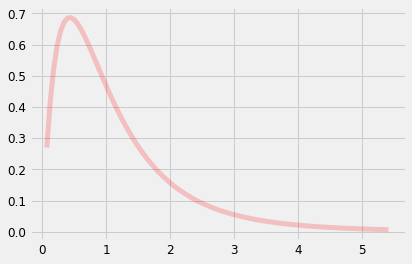

In [24]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(f.ppf(0.01, dfn, dfd),
               f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),
          'r-', lw=5, alpha=0.2, label='f pdf')

### Running mean

In [25]:
# Running mean
def f_running_mean(x):
#     N = 4
# Define df with two columns: index + count
    xx = pd.DataFrame()
    xx = x#['High']
    xx = xx.reset_index(drop=True)
    
    out = np.zeros_like(x.values, dtype=np.float64) #df_trn_y    
    dim_len = x.shape[0]
    for i in (range(dim_len)):
        if (xx['High'][i] == 0)&(i != 0):
            out[i,1] = xx['High'][i-1]
            out[i,3] = xx['Low'][i-1]
            xx['High'][i] = out[i,1]
            xx['Low'][i] = out[i,3]  

    df_rm_qnty = pd.DataFrame({'High': xx['High'], 'Low': xx['Low']})
    df_rm_qnty.index = x.index    
    return  pd.DataFrame({'High' : df_rm_qnty['High'], 
                          'Low': df_rm_qnty['Low']
                         }) #.reset_index(drop = True)

In [26]:
aa = np.zeros_like(df_trn_y.values, dtype=np.float64)
df_trn_y['High'][0]

71.49019622802734

In [28]:
out = np.zeros_like(df_trn_y.values, dtype=np.float64) #df_trn_y

In [29]:
out[0,1]

0.0

In [31]:
df_trn_y_ = f_running_mean(df_trn_y)
df_trn_y_.head(11), df_trn_y_.shape

(         High        Low
 0   71.490196  70.576500
 1   71.204903  70.599998
 2   71.598000  70.802696
 3   71.973999  71.262199
 4   71.973999  71.262199
 5   71.973999  71.262199
 6   71.899002  71.407997
 7   72.647202  71.468399
 8   72.584000  72.067001
 9   73.764999  72.465797
 10  74.386803  73.128998,
 (56, 2))

In [33]:
df_trn_y_.index = df_trn_y['DT']
df_trn_y_.index

DatetimeIndex(['2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
               '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
               '2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02',
               '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14'],
     

## SARIMA

In [133]:
y = df_trn_y_
y.head(11)

,High,Low
DT,,
2020-07-21,71.490196,70.576500
2020-07-22,71.204903,70.599998
2020-07-23,71.598000,70.802696
2020-07-24,71.973999,71.262199
2020-07-25,71.973999,71.262199
2020-07-26,71.973999,71.262199
2020-07-27,71.899002,71.407997
2020-07-28,72.647202,71.468399
2020-07-29,72.584000,72.067001


In [35]:
y.iloc[:,[0]].isnull().values.any()

False

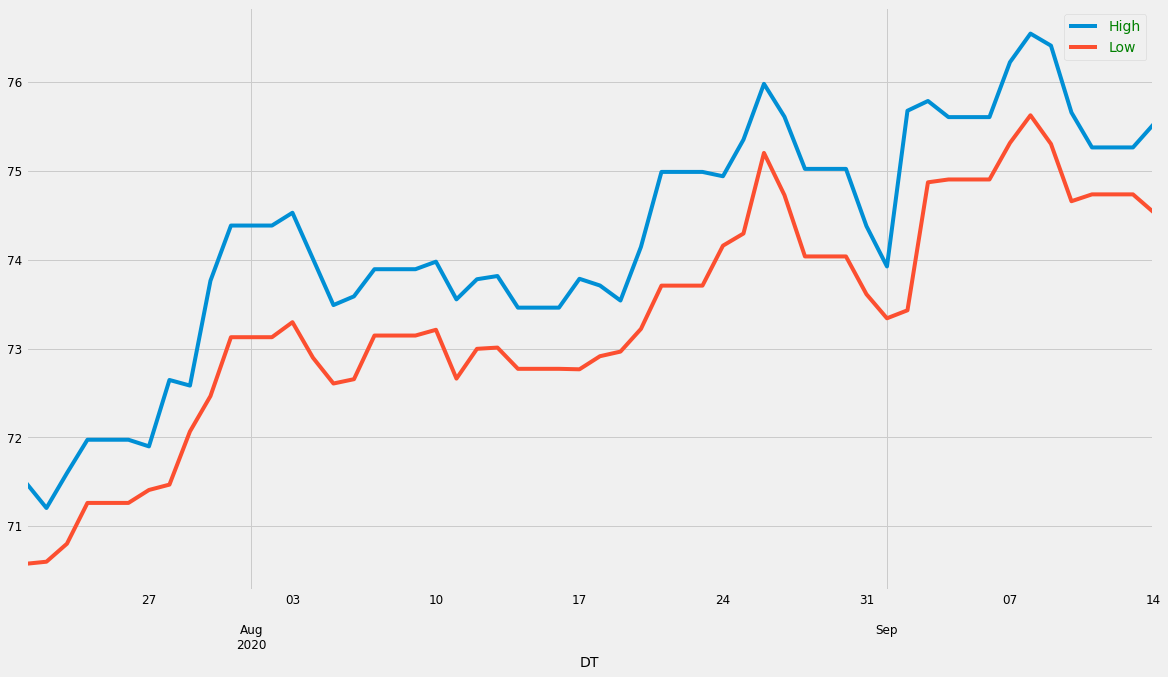

In [36]:
y.plot(figsize=(18, 10))
plt.show()

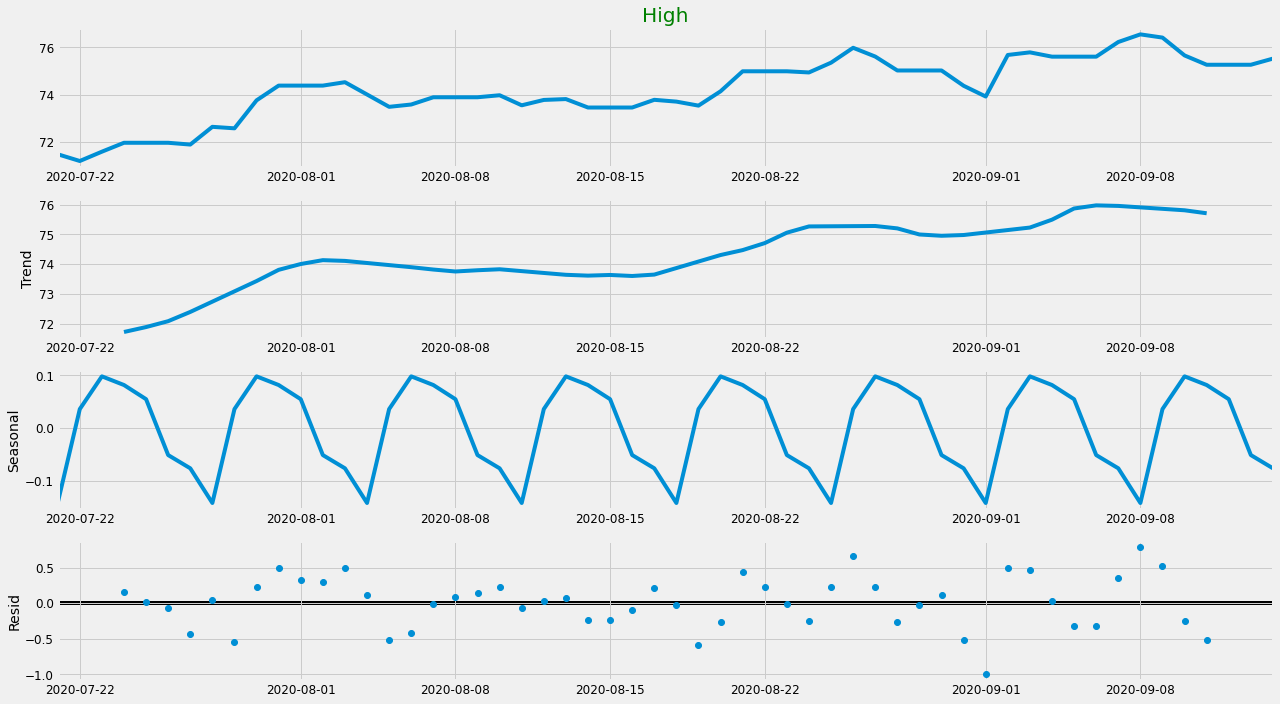

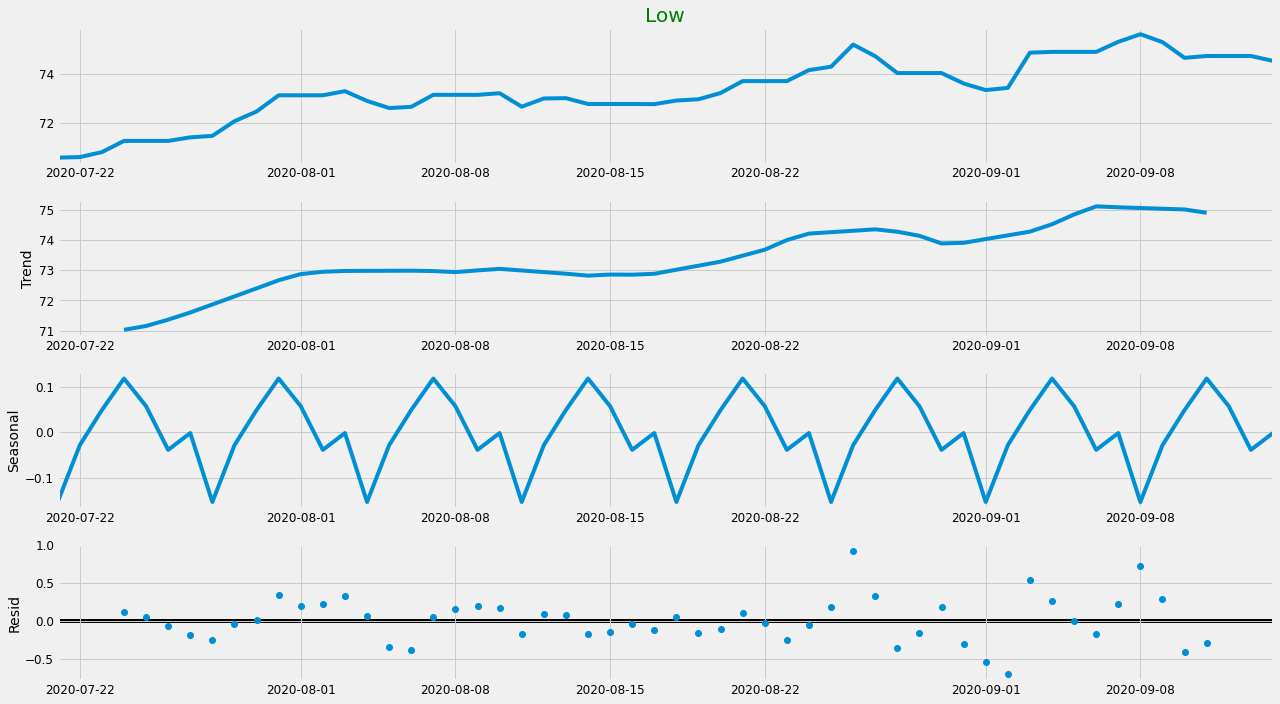

In [45]:
# decompose the time-series into three distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
# rcParams.
# freq=1,
decomposition = sm.tsa.seasonal_decompose(y['High'], model='additive'
#                                          , period = 7
                                         )
decomposition2 = sm.tsa.seasonal_decompose(y['Low'], model='additive'
#                                          , period = 7
                                         )
fig = decomposition.plot()
fig2 = decomposition2.plot()
# xlim = ('2020-04-22 00:00:00+00:00','2020-04-22 23:00:00+00:00')
plt.show()

### Graph 4sesonal

In [46]:
decomposition.seasonal.values

array([-0.14259745,  0.03595841,  0.09824448,  0.0817433 ,  0.05480722,
       -0.0514866 , -0.07666936, -0.14259745,  0.03595841,  0.09824448,
        0.0817433 ,  0.05480722, -0.0514866 , -0.07666936, -0.14259745,
        0.03595841,  0.09824448,  0.0817433 ,  0.05480722, -0.0514866 ,
       -0.07666936, -0.14259745,  0.03595841,  0.09824448,  0.0817433 ,
        0.05480722, -0.0514866 , -0.07666936, -0.14259745,  0.03595841,
        0.09824448,  0.0817433 ,  0.05480722, -0.0514866 , -0.07666936,
       -0.14259745,  0.03595841,  0.09824448,  0.0817433 ,  0.05480722,
       -0.0514866 , -0.07666936, -0.14259745,  0.03595841,  0.09824448,
        0.0817433 ,  0.05480722, -0.0514866 , -0.07666936, -0.14259745,
        0.03595841,  0.09824448,  0.0817433 ,  0.05480722, -0.0514866 ,
       -0.07666936])

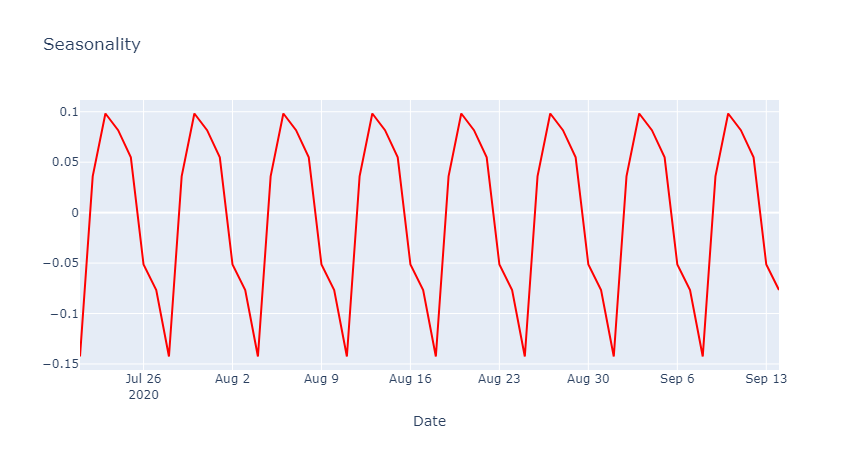

In [47]:
# Graph_seasonal
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)
# Create traces
trace0 = go.Scatter(
    x=list(decomposition.seasonal.index),
    y=list(decomposition.seasonal.values),
#     mode = 'markers+lines',
    name = 'High',
    line=dict(
                color="Red",
                width=2,
#                 dash="dashdot",
            ),
#     fill = 'toself',
    
)

# Define data array & title & axis in layout
# data = [trace0, trace1, trace2, trace3, trace4]
data = [trace0]
layout = {'title': 'Seasonality', 'xaxis': {'title': 'Date'}}

# Creatr Figure object
fig = go.Figure(data=data, layout=layout)
# iplot(fig, show_link=False)
iplot(fig)

### SARIMA params

In [53]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('SARIMA parameters...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [80]:
# AIC (Akaike information criterion) is an estimator of the 
# relative quality of statistical models for a given set of data.
# AIC estimates the quality of each model, relative to each of the other models. The low 
# AIC value the better Ex.: output SARIMAX(1, 1, 0)x(1, 0, 1, 12) with AIC value of 
# 40.74 is the best combination - optimal option.
import warnings

warnings.filterwarnings('ignore')

p_opt_hi = pd.DataFrame(columns=['1','2','3','s1','s2','s3','AIC'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['High'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
#             print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
            p_opt_hi=\
            p_opt_hi.append({'1': param[0], '2': param[1], '3': param[2],
                             's1': param_seasonal[0], 's2': param_seasonal[1], 's3': param_seasonal[2],
                             'AIC': results.aic
                            }, ignore_index=True
                           )            
        except: 
            continue
        

In [81]:
warnings.filterwarnings('ignore')

p_opt_lo = pd.DataFrame(columns=['1','2','3','s1','s2','s3','AIC'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['Low'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
#             print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
            p_opt_lo=\
            p_opt_lo.append({'1': param[0], '2': param[1], '3': param[2],
                             's1': param_seasonal[0], 's2': param_seasonal[1], 's3': param_seasonal[2],
                             'AIC': results.aic
                            }, ignore_index=True
                           )
        except: 
            continue

In [87]:
p_opt_hi[p_opt_hi['AIC'] == p_opt_hi['AIC'].min()],\
p_opt_lo[p_opt_lo['AIC'] == p_opt_lo['AIC'].min()]

(      1    2    3   s1   s2   s3        AIC
 25  0.0  1.0  1.0  0.0  0.0  1.0  56.711006,
       1    2    3   s1   s2   s3        AIC
 53  1.0  1.0  0.0  1.0  0.0  1.0  40.743425)

In [88]:
# 5
# ARIMA(0, 0, 1)x(0, 1, 1, 5)7 - AIC:0.47087026399143994
# ARIMA(1, 1, 1)x(0, 1, 0, 5)7 - AIC:1.3089577048598429

# ARIMA(1, 1, 0)x(0, 1, 1, 5)7 - AIC:16.930271225834858
# ARIMA(0, 1, 1)x(1, 1, 1, 5)7 - AIC:2.0075999129938635

# 7
# ARIMA(1, 0, 1)x(0, 1, 1, 7)7 - AIC:96.86187733321228
# ARIMA(1, 1, 1)x(0, 0, 1, 7)7 - AIC:95.79357751921661

# For 9 years
# ARIMA(1, 1, 1)x(1, 1, 1, 7)7 - AIC:6038.639625270507
# ARIMA(1, 1, 0)x(0, 0, 1, 7)7 - AIC:4442.725261136969

mod = sm.tsa.statespace.SARIMAX(y['High'],
                                order=(0, 1, 1),
                                seasonal_order=(0, 0, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
# print(results.summary().tables[1])

mod2 = sm.tsa.statespace.SARIMAX(y['Low'],
                                order=(1, 1, 0),
                                seasonal_order=(1, 0, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()
print(results.summary().tables[1])
print('----- ----- ----- ----- -----')
print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3668      0.151      2.432      0.015       0.071       0.662
ma.S.L7        0.0159      0.185      0.086      0.932      -0.347       0.379
sigma2         0.1762      0.024      7.199      0.000       0.128       0.224
----- ----- ----- ----- -----
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1553      0.126      1.231      0.218      -0.092       0.403
ar.S.L7        0.4524      0.169      2.681      0.007       0.122       0.783
ma.S.L7       -1.0001   1434.765     -0.001      0.999   -2813.088    2811.088
sigma2         0.0867    124.409      0.001      0.999    -243.750     243.923


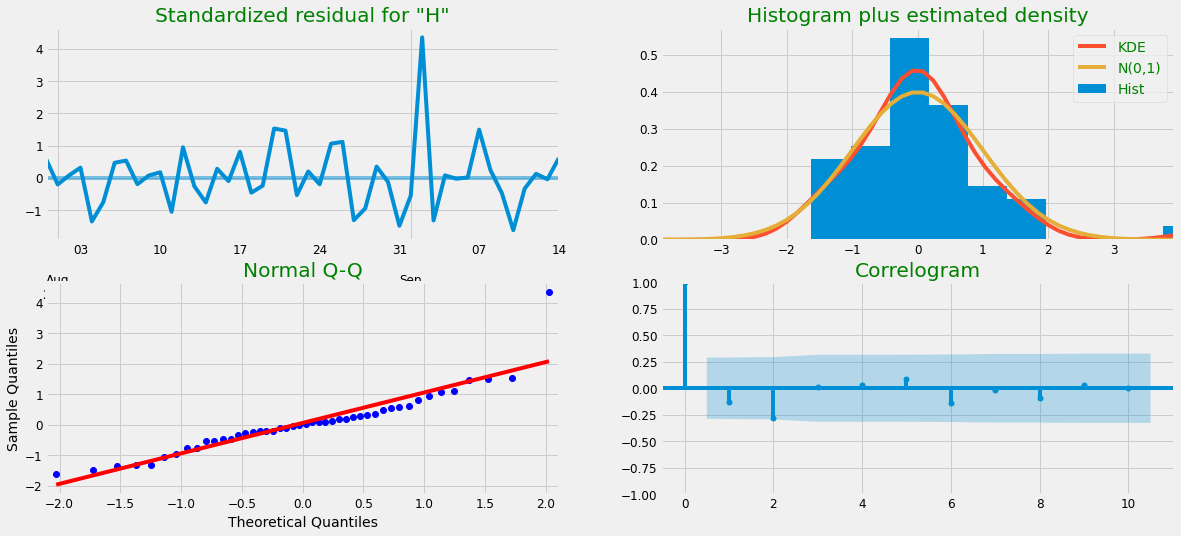

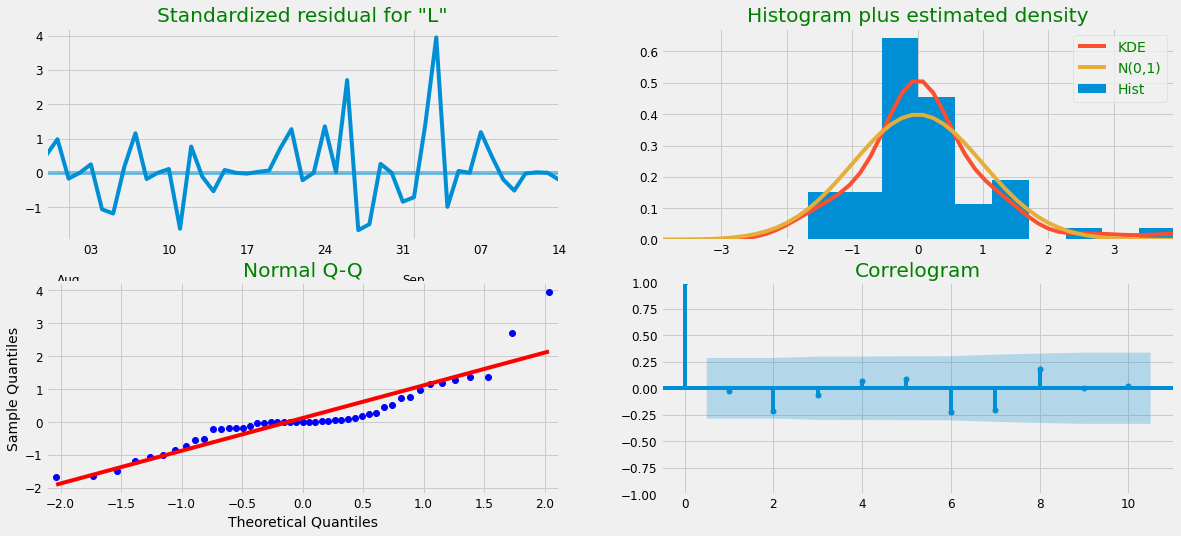

In [89]:
# Important information as the distribution and the 
# Auto correlation function ACF (correlogram). 
# Values upward the “0” has some correlation over the time series data. 
# Values near to “1” demonstrates strongest correlation.
results.plot_diagnostics(figsize=(18, 8))
results2.plot_diagnostics(figsize=(18, 8))
plt.show()

In [90]:
# y['2020':].plot(label='observed')
# y
# pred = results.get_prediction(start=pd.to_datetime('2020-02-01'), dynamic=False)
# pred2 = results2.get_prediction(start=pd.to_datetime('2020-03-01'), dynamic=False)

<AxesSubplot:xlabel='DT'>

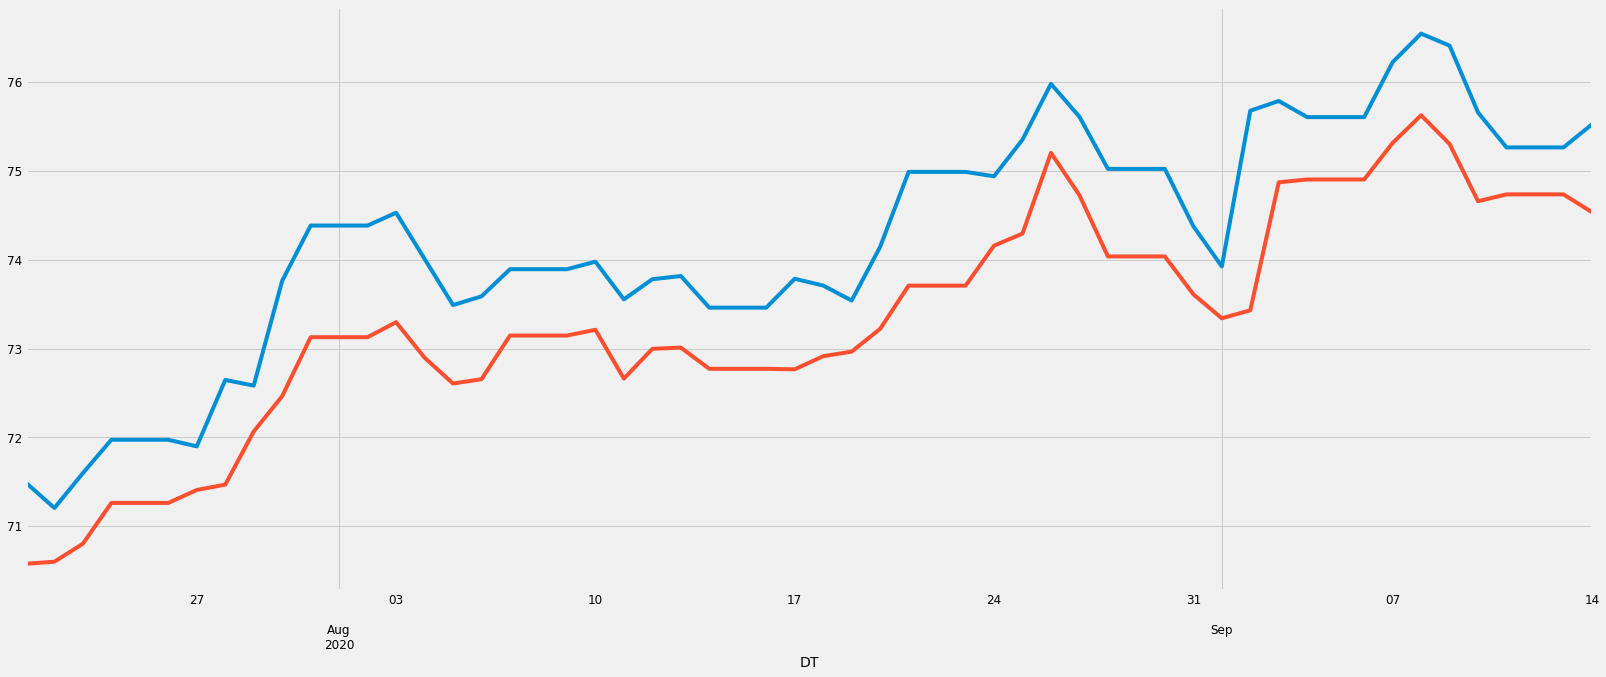

In [97]:
# Comparing the true values with the forecast predictions. 
# The command “pred = results.get_prediction(start=pd.to_datetime(‘date’)” 
# determines the period which you would forecast in comparing wiht the true data.

# pred = results.get_prediction(start=pd.to_datetime('2020-04-01 00:00:00+00:00'), dynamic=False)
pred = results.get_prediction(start=pd.to_datetime('2020-09-14'), dynamic=False)
pred2 = results2.get_prediction(start=pd.to_datetime('2020-09-14'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['High']['2020':].plot(label='obs')
ax2 = y['Low']['2020':].plot(label='obs2')
pred.predicted_mean.plot(ax=ax, label='1-step ahead Frcst', 
                         alpha=.7, figsize=(25, 10)
#                          , xlim = ('2020-04-22 00:00:00+00:00','2020-04-22 23:00:00+00:00')
#                          , xlim = ('2019-10-15','2019-12-02')
#                          , ylim = (72,80)
                        )
pred2.predicted_mean.plot(ax=ax2, label='1-step ahead Frcst2', 
                         alpha=.7, figsize=(25, 10)
#                          , xlim = ('2020-04-22 00:00:00+00:00','2020-04-22 23:00:00+00:00')
#                          , xlim = ('2019-10-15','2019-12-02')
#                          , ylim = (72,80)
                        )
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Retail_sold')
# plt.legend()
# plt.show()

In [99]:
# Comparing the true values with the forecast predictions. 
# The command “pred = results.get_prediction(start=pd.to_datetime(‘date’)” 
# determines the period which you would forecast in comparing wiht the true data.
y_forecasted = pd.DataFrame(pred.predicted_mean)
y_forecasted.columns = ['High']

y_forecasted2 = pd.DataFrame(pred2.predicted_mean)
y_forecasted2.columns = ['Low']

# y_truth = y['2020-04-30 00:00:00+00:00':]
y_truth = pd.DataFrame(y['High']['2020-09-14':])
mse = ((y_forecasted - y_truth)** 2).mean()

y_truth2 = pd.DataFrame(y['Low']['2020-09-14':])
mse2 = ((y_forecasted2 - y_truth2)** 2).mean()
# mse
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

print('The Mean Squared Error is {}'.format(round(mse2, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse2), 2)))

The Mean Squared Error is High    0.07
dtype: float64
The Root Mean Squared Error is High    0.26
dtype: float64
The Mean Squared Error is Low    0.0
dtype: float64
The Root Mean Squared Error is Low    0.06
dtype: float64


In [100]:
pred_uc.predicted_mean

2020-09-15    75.626029
2020-09-16    75.623430
2020-09-17    75.611422
2020-09-18    75.605214
2020-09-19    75.605214
2020-09-20    75.605214
2020-09-21    75.609186
Freq: D, Name: predicted_mean, dtype: float64

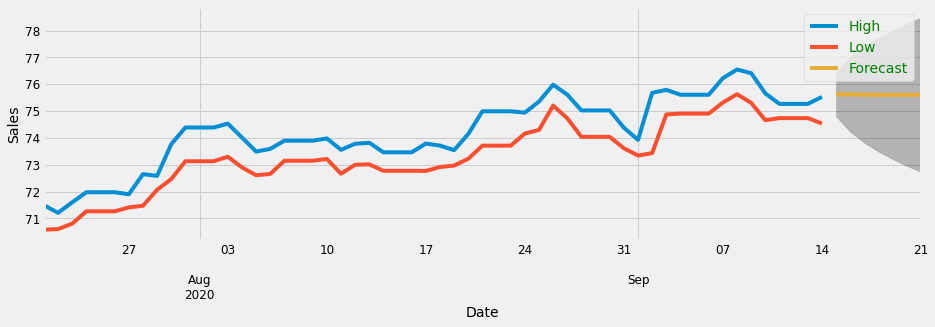

In [101]:
# Obs: In both MSE and RMSE, values closer to zero are better. They are a measure of accuracy.
pred_uc = results.get_forecast(steps=7)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

pred_uc2 = results2.get_forecast(steps=7)
pred_ci2 = pred_uc2.conf_int()


ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [102]:
((pred_uc.predicted_mean + pred_uc2.predicted_mean)/2).values


array([75.05833582, 74.995673  , 74.91709681, 74.94575178, 74.94589375,
       74.94591579, 74.93030299])

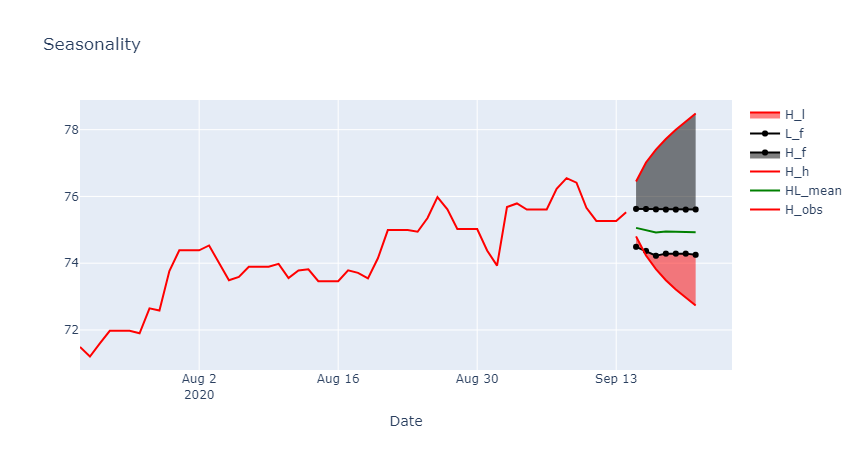

In [103]:
# Graph_frcst_high
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)
# создаем traces для визуализации
trace0 = go.Scatter(
    x=list(y.index),
    y=list(y['High'].values),
#     mode = 'markers+lines',
    name = 'H_obs',
    line=dict(
                color="Red",
                width=2,
#                 dash="dashdot",
            ),
#     fill = 'toself',
    
)

trace1 = go.Scatter(
    x=list(pred_uc.predicted_mean.index),
    y=list(((pred_uc.predicted_mean + pred_uc2.predicted_mean)/2).values),
    mode = 'lines',
    name = 'HL_mean',
    line=dict(
                color="Green",
                width=2,
#                 dash="dashdot",
            ),
#     fillcolor="LightSalmon",
#     fill = 'toself',
#     fill='tozeroy',
#     fill='tonexty',
)

trace2 = go.Scatter(
    x=list(pred_ci.index),
    y=list(pred_ci.iloc[:, 1].values),
    mode = 'lines',
    name = 'H_h',
    line=dict(
                color="Red",
                width=2,
#                 dash="dashdot",
            ),
#     fillcolor="LightSalmon",
#     fill = 'toself',
#     fill='tozeroy',
#     fill='tonexty',
)

trace3 = go.Scatter(
    x=list(pred_uc.predicted_mean.index),
    y=list(pred_uc.predicted_mean.values),
#     mode = 'markers+lines',
    name = 'H_f',
    line=dict(
                color="black",
                width=2,
#                 dash="dashdot",
            ),
#     fillcolor="LightSalmon",
#     fill = 'toself',
    fill='tonexty',
    
)

trace4 = go.Scatter(
    x=list(pred_uc2.predicted_mean.index),
    y=list(pred_uc2.predicted_mean.values),
#     mode = 'markers+lines',
    name = 'L_f',
    line=dict(
                color="black",
                width=2,
#                 dash="dashdot",
            ),
#     fillcolor="LightSalmon",
#     fill = 'toself',
#     fill='tonexty',
    
)

trace5 = go.Scatter(
    x=list(pred_ci.index),
    y=list(pred_ci.iloc[:, 0].values),
    mode = 'lines',
    name = 'H_l',
    line=dict(
                color="Red",
                width=2,
#                 dash="dashdot",
            ),
#     fill = 'toself',
    fill='tonexty',
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = {'title': 'Seasonality', 'xaxis': {'title': 'Date'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
# iplot(fig, show_link=False)
iplot(fig)

In [496]:
# Save plotly
plotly.offline.plot(data, filename='graph_f.html')

'graph_f.html'

### Frcst & Prec

In [497]:
# Forecast the sales for the next 12 months. This parameter can me modified in the 
# line “pred_uc = results.get_forecast(steps=12)” of the code.
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2020-04-01    79.466264
2020-04-02    78.892954
2020-04-03    79.545579
2020-04-04    77.332837
2020-04-05    78.334345
2020-04-06    79.022150
2020-04-07    76.113354
2020-04-08    76.097337
2020-04-09    75.993814
2020-04-10    74.720479
2020-04-11    74.722208
2020-04-12    74.721192
Freq: D, dtype: float64

In [498]:
truth_frcst_res = y_truth#pd.DataFrame(y_truth)
truth_frcst_res = truth_frcst_res.assign(Low = y_truth2, 
                                         High_f = y_forecasted, 
                                         Low_f = y_forecasted2)

# truth_frcst_res = truth_frcst_res.DataFrame()
truth_frcst_res = truth_frcst_res[(truth_frcst_res.index.dayofweek != 5) &\
                                  (truth_frcst_res.index.dayofweek != 6)]
truth_frcst_res.head(),truth_frcst_res.shape
# y_truth2.head(12)

(                 High        Low  High_f  Low_f
 DT                                             
 2020-03-23  81.338997  79.487000     NaN    NaN
 2020-03-24  79.571602  78.146004     NaN    NaN
 2020-03-25  79.362999  76.970703     NaN    NaN
 2020-03-26  78.998001  76.990303     NaN    NaN
 2020-03-27  79.238800  77.329697     NaN    NaN, (40, 4))

In [499]:
# Density fact and frcst
df_dens = pd.DataFrame({'Dens': []})
d_hl = truth_frcst_res['High']-truth_frcst_res['Low']
d_hl_f = truth_frcst_res['High_f']-truth_frcst_res['Low_f']
for i in range(truth_frcst_res.shape[0]):
    if truth_frcst_res['Low_f'][i] > truth_frcst_res['High'][i]:
        df_dens = df_dens.append(pd.DataFrame({'Dens': [0]}))
    elif (truth_frcst_res['High_f'][i] <= truth_frcst_res['High'][i])&\
         (truth_frcst_res['Low_f'][i] >= truth_frcst_res['Low'][i]):
        z = np.abs(d_hl_f[i] / d_hl[i])
        df_dens = df_dens.append(pd.DataFrame({'Dens': [z]}))        
#         df_dens = df_dens.append(pd.DataFrame({'Dens': [1]}))
    elif (truth_frcst_res['High_f'][i] > truth_frcst_res['High'][i])&\
            (truth_frcst_res['Low_f'][i] >= truth_frcst_res['Low'][i]):
        z = np.abs(d_hl_f[i] - (truth_frcst_res['High_f'][i] - truth_frcst_res['High'][i])) / d_hl[i]
        df_dens = df_dens.append(pd.DataFrame({'Dens': [z]}))
    elif (truth_frcst_res['High_f'][i] <= truth_frcst_res['High'][i])&\
         (truth_frcst_res['Low_f'][i] < truth_frcst_res['Low'][i]):
        z = np.abs(d_hl_f[i] - (truth_frcst_res['Low'][i] - truth_frcst_res['Low_f'][i])) / d_hl[i]
        df_dens = df_dens.append(pd.DataFrame({'Dens': [z]}))

In [268]:
df_dens.head()

,Dens
0,0.933545
0,0.793394
0,0.029734
0,0.029573
0,0.720033


In [255]:
# Density fact and frcst
df_dens = pd.DataFrame({'Dens': []})
d_hhf = truth_frcst_res['High']-truth_frcst_res['High_f']
d_llf = truth_frcst_res['Low']-truth_frcst_res['Low_f']
Prec_H =  1 - (np.abs(d_hhf).sum() / (truth_frcst_res['High'].sum()))
Prec_L =  1 - (np.abs(d_llf).sum() / (truth_frcst_res['Low'].sum()))
Prec_H, Prec_L

(0.9928204634443477, 0.9934228109801585)

In [256]:
d_hhf_def = \
np.abs(truth_frcst_res[truth_frcst_res['High'] > truth_frcst_res['High_f']]['High']-\
truth_frcst_res[truth_frcst_res['High'] > truth_frcst_res['High_f']]['High_f']).sum()/\
truth_frcst_res['High'].sum()

d_hhf_prof = \
np.abs(truth_frcst_res[truth_frcst_res['High'] < truth_frcst_res['High_f']]['High']-\
truth_frcst_res[truth_frcst_res['High'] < truth_frcst_res['High_f']]['High_f']).sum()/\
truth_frcst_res['High'].sum()


d_hhf_def*100, d_hhf_prof*100, (d_hhf_def + d_hhf_prof)*100, (1 - Prec_H)*100

(0.3967823211014311,
 0.32117133446380236,
 0.7179536555652334,
 0.7179536555652288)

In [500]:
df_dens.max(), df_dens.min(), df_dens.mean(), df_dens.shape

(Dens    0.876175
 dtype: float64, Dens    0.0
 dtype: float64, Dens    0.435435
 dtype: float64, (23, 1))

In [258]:
df_dens = pd.DataFrame({'Dens': []})
df_dens.append(pd.DataFrame({'Dens': [2]}))

,Dens
0,2.0


In [259]:
# In the table above we can visualize the lower and upper values which the model 
# indicate as boundaries for the forecasting.
pred_ci.head(24)

,lower High,upper High
2020-05-14,73.104986,75.481214
2020-05-15,72.470150,76.068670
2020-05-16,72.106303,76.483281
2020-05-17,71.725788,76.831005
2020-05-18,71.538405,77.240532


In [260]:
# Finally we have the sales forecasting for the next define perid
# This is a experimentation with a statistical model.
forecast = pred_uc.predicted_mean
forecast.head(12)

2020-05-14    74.293100
2020-05-15    74.269410
2020-05-16    74.294792
2020-05-17    74.278396
2020-05-18    74.389468
Freq: D, dtype: float64

## Graph 

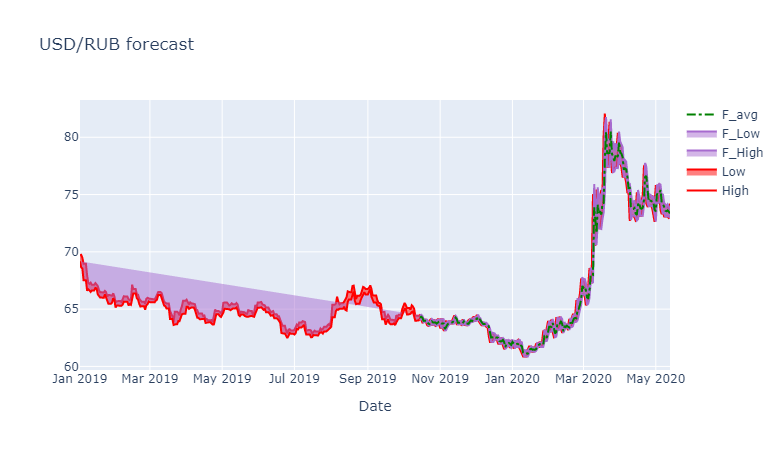

In [261]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

# df_model_xy = df_model_xy.reset_index(drop = True)
# df_model_xy = df_result_full2_grpf.reset_index(drop = True)


i = 9
init_notebook_mode(connected=True)
# создаем traces для визуализации
trace0 = go.Scatter(
    x=list(y['High']['2019':].index),
    y=list(y['High']['2019':].values),
#     mode = 'markers+lines',
    name = 'High',
    line=dict(
                color="Red",
                width=2,
#                 dash="dashdot",
            ),
#     fill = 'toself',
    
)

trace1 = go.Scatter(
    x=list(y['Low']['2019':].index),
    y=list(y['Low']['2019':].values),
#     mode = 'markers+lines',
    name = 'Low',
    line=dict(
                color="Red",
                width=2,
#                 dash="dashdot",
            ),
#     fill = 'toself',
    fill='tonexty',
)

trace2 = go.Scatter(
    x=list(pd.DataFrame(pred.predicted_mean).index),
    y=list(pd.DataFrame(pred.predicted_mean)[0]),
#     mode = 'markers+lines',
    name = 'F_High',
    line=dict(
                color="#a76bcf",
                width=2,
#                 dash="dashdot",
            ),
#     fillcolor="LightSalmon",
#     fill = 'toself',
#     fill='tozeroy',
    fill='tonexty',
)

trace3 = go.Scatter(
    x=list(pd.DataFrame(pred2.predicted_mean).index),
    y=list(pd.DataFrame(pred2.predicted_mean)[0]),
#     mode = 'markers+lines',
    name = 'F_Low',
    line=dict(
                color="#a76bcf",
                width=2,
#                 dash="dashdot",
            ),
#     fillcolor="LightSalmon",
#     fill = 'toself',
    fill='tonexty',
    
)

trace4 = go.Scatter(
    x=list(pd.DataFrame(pred2.predicted_mean).index),
    y=list(pd.DataFrame((pred.predicted_mean + pred2.predicted_mean)/2)[0]),
#     mode = 'markers+lines',
    name = 'F_avg',
    line=dict(
                color="Green",
                width=2,
                dash="dashdot",
            ),
#     fillcolor="LightSalmon",
    
)


# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1, trace2, trace3, trace4]
# data = [trace0, trace1]
layout = {'title': 'USD/RUB forecast', 'xaxis': {'title': 'Date'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
# iplot(fig, show_link=False)
iplot(fig)